# **Stock Market Analysis**


In [162]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
rel_df = pd.read_csv('RELIANCE.csv')
tcs_df = pd.read_csv('TCS.csv')
hdfc_df = pd.read_csv('HDFCBANK.csv')
titan_df = pd.read_csv('TITAN.csv')
brit_df = pd.read_csv('BRITANNIA.csv')

In [4]:
merged_df = pd.concat([rel_df, tcs_df, hdfc_df, titan_df, brit_df], ignore_index= True)

In [144]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25362 entries, 0 to 25361
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                25362 non-null  object 
 1   Series              25362 non-null  object 
 2   Prev Close          25362 non-null  float64
 3   Open                25362 non-null  float64
 4   High                25362 non-null  float64
 5   Low                 25362 non-null  float64
 6   Last                25362 non-null  float64
 7   Close               25362 non-null  float64
 8   VWAP                25362 non-null  float64
 9   Volume              25362 non-null  int64  
 10  Turnover            25362 non-null  float64
 11  Trades              12280 non-null  float64
 12  Deliverable Volume  23316 non-null  float64
 13  %Deliverble         23316 non-null  float64
 14  Name                25362 non-null  object 
dtypes: float64(11), int64(1), object(3)
memory usage: 2.9

In [6]:
merged_df

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2000-01-03,RELIANCE,EQ,233.05,237.50,251.70,237.50,251.70,251.70,249.37,4456424,1.111319e+14,NaN,NaN,NaN
1,2000-01-04,RELIANCE,EQ,251.70,258.40,271.85,251.30,271.85,271.85,263.52,9487878,2.500222e+14,NaN,NaN,NaN
2,2000-01-05,RELIANCE,EQ,271.85,256.65,287.90,256.65,286.75,282.50,274.79,26833684,7.373697e+14,NaN,NaN,NaN
3,2000-01-06,RELIANCE,EQ,282.50,289.00,300.70,289.00,293.50,294.35,295.45,15682286,4.633254e+14,NaN,NaN,NaN
4,2000-01-07,RELIANCE,EQ,294.35,295.00,317.90,293.00,314.50,314.55,308.91,19870977,6.138388e+14,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25357,2021-04-26,BRITANNIA,EQ,3650.30,3661.10,3662.00,3531.00,3546.00,3539.20,3558.62,1031406,3.670382e+14,72258.0,507276.0,0.4918
25358,2021-04-27,BRITANNIA,EQ,3539.20,3572.70,3574.60,3517.00,3546.00,3541.20,3539.42,813608,2.879697e+14,46189.0,322686.0,0.3966
25359,2021-04-28,BRITANNIA,EQ,3541.20,3488.00,3527.00,3469.00,3470.00,3478.75,3495.13,1498181,5.236339e+14,97170.0,763715.0,0.5098
25360,2021-04-29,BRITANNIA,EQ,3478.75,3496.75,3505.90,3447.00,3464.00,3468.90,3471.18,611087,2.121195e+14,41655.0,309653.0,0.5067


In [7]:
merged_df['Name'] = merged_df['Symbol'].str.lower()

In [8]:
merged_df.drop(columns = ['Symbol'], inplace = True)

In [163]:
new_merged_df = merged_df.copy()
new_merged_df.drop(columns = ['Series'], inplace = True)

In [164]:
new_merged_df

,Date,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble,Name
0,2000-01-03,233.05,237.50,251.70,237.50,251.70,251.70,249.37,4456424,1.111319e+14,NaN,NaN,NaN,reliance
1,2000-01-04,251.70,258.40,271.85,251.30,271.85,271.85,263.52,9487878,2.500222e+14,NaN,NaN,NaN,reliance
2,2000-01-05,271.85,256.65,287.90,256.65,286.75,282.50,274.79,26833684,7.373697e+14,NaN,NaN,NaN,reliance
3,2000-01-06,282.50,289.00,300.70,289.00,293.50,294.35,295.45,15682286,4.633254e+14,NaN,NaN,NaN,reliance
4,2000-01-07,294.35,295.00,317.90,293.00,314.50,314.55,308.91,19870977,6.138388e+14,NaN,NaN,NaN,reliance
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25357,2021-04-26,3650.30,3661.10,3662.00,3531.00,3546.00,3539.20,3558.62,1031406,3.670382e+14,72258.0,507276.0,0.4918,britannia
25358,2021-04-27,3539.20,3572.70,3574.60,3517.00,3546.00,3541.20,3539.42,813608,2.879697e+14,46189.0,322686.0,0.3966,britannia
25359,2021-04-28,3541.20,3488.00,3527.00,3469.00,3470.00,3478.75,3495.13,1498181,5.236339e+14,97170.0,763715.0,0.5098,britannia
25360,2021-04-29,3478.75,3496.75,3505.90,3447.00,3464.00,3468.90,3471.18,611087,2.121195e+14,41655.0,309653.0,0.5067,britannia


In [19]:
new_merged_df.loc[:, 'Date'] = pd.to_datetime(new_merged_df['Date'])

In [20]:
final_df = new_merged_df[new_merged_df['Date'] >= '2020-01-01']

In [21]:
final_df

,Date,Name,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Deliverable Volume,%Deliverble,Trades
4974,2020-01-01,reliance,1514.05,1518.00,1527.10,1505.5,1511.80,1509.60,1515.23,6402372,9.701063e+14,1523290.0,0.2379,122265.0
4975,2020-01-02,reliance,1509.60,1512.00,1540.95,1512.0,1534.10,1535.30,1530.86,8096561,1.239471e+15,3386321.0,0.4182,151727.0
4976,2020-01-03,reliance,1535.30,1533.00,1541.65,1523.0,1536.00,1537.15,1532.73,9593498,1.470428e+15,5288843.0,0.5513,149003.0
4977,2020-01-06,reliance,1537.15,1520.00,1527.90,1498.0,1499.90,1501.50,1512.57,11209343,1.695494e+15,6398638.0,0.5708,225138.0
4978,2020-01-07,reliance,1501.50,1519.00,1534.50,1513.5,1526.95,1524.60,1523.12,7627191,1.161710e+15,3049916.0,0.3999,180713.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25357,2021-04-26,britannia,3650.30,3661.10,3662.00,3531.0,3546.00,3539.20,3558.62,1031406,3.670382e+14,507276.0,0.4918,72258.0
25358,2021-04-27,britannia,3539.20,3572.70,3574.60,3517.0,3546.00,3541.20,3539.42,813608,2.879697e+14,322686.0,0.3966,46189.0
25359,2021-04-28,britannia,3541.20,3488.00,3527.00,3469.0,3470.00,3478.75,3495.13,1498181,5.236339e+14,763715.0,0.5098,97170.0
25360,2021-04-29,britannia,3478.75,3496.75,3505.90,3447.0,3464.00,3468.90,3471.18,611087,2.121195e+14,309653.0,0.5067,41655.0


In [37]:
hdfc_df = final_df[final_df['Name']  == 'hdfcbank']
brit_df = final_df[final_df['Name']  == 'britannia']
rel_df = final_df[final_df['Name']  == 'reliance']
titan_df = final_df[final_df['Name']  == 'titan']
tcs_df = final_df[final_df['Name']  == 'tcs']

## Comparison of Closing Prices Across Companies

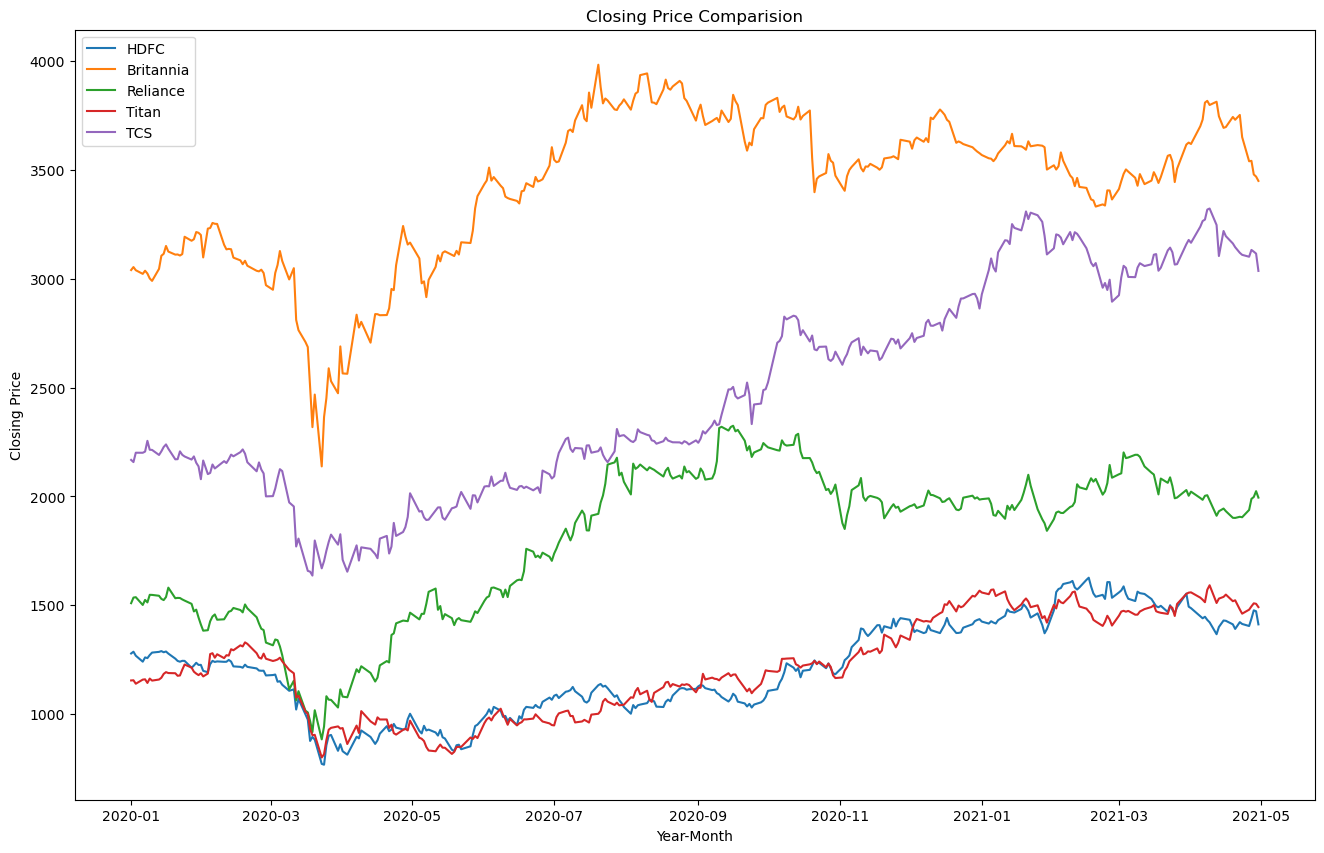

In [93]:
plt.figure(figsize = (16,10))
plt.xlabel('Year-Month')
plt.ylabel('Closing Price')
plt.title('Closing Price Comparision')
plt.plot('Date','Close', data = hdfc_df)
plt.plot('Date','Close', data = brit_df)
plt.plot('Date','Close', data = rel_df)
plt.plot('Date','Close', data = titan_df)
plt.plot('Date','Close', data = tcs_df)
plt.legend(['HDFC', 'Britannia', 'Reliance', 'Titan', 'TCS'])

From the graph, it's evident that Britannia consistently has the highest closing price, while Titan and HDFC have the lowest and nearly identical closing prices. 
Additionally, the graph shows a significant decline in the closing prices of all companies towards the end of February 2020, coinciding with the initial spread of COVID-19. 

## Comparison of Volume Sold Across Companies

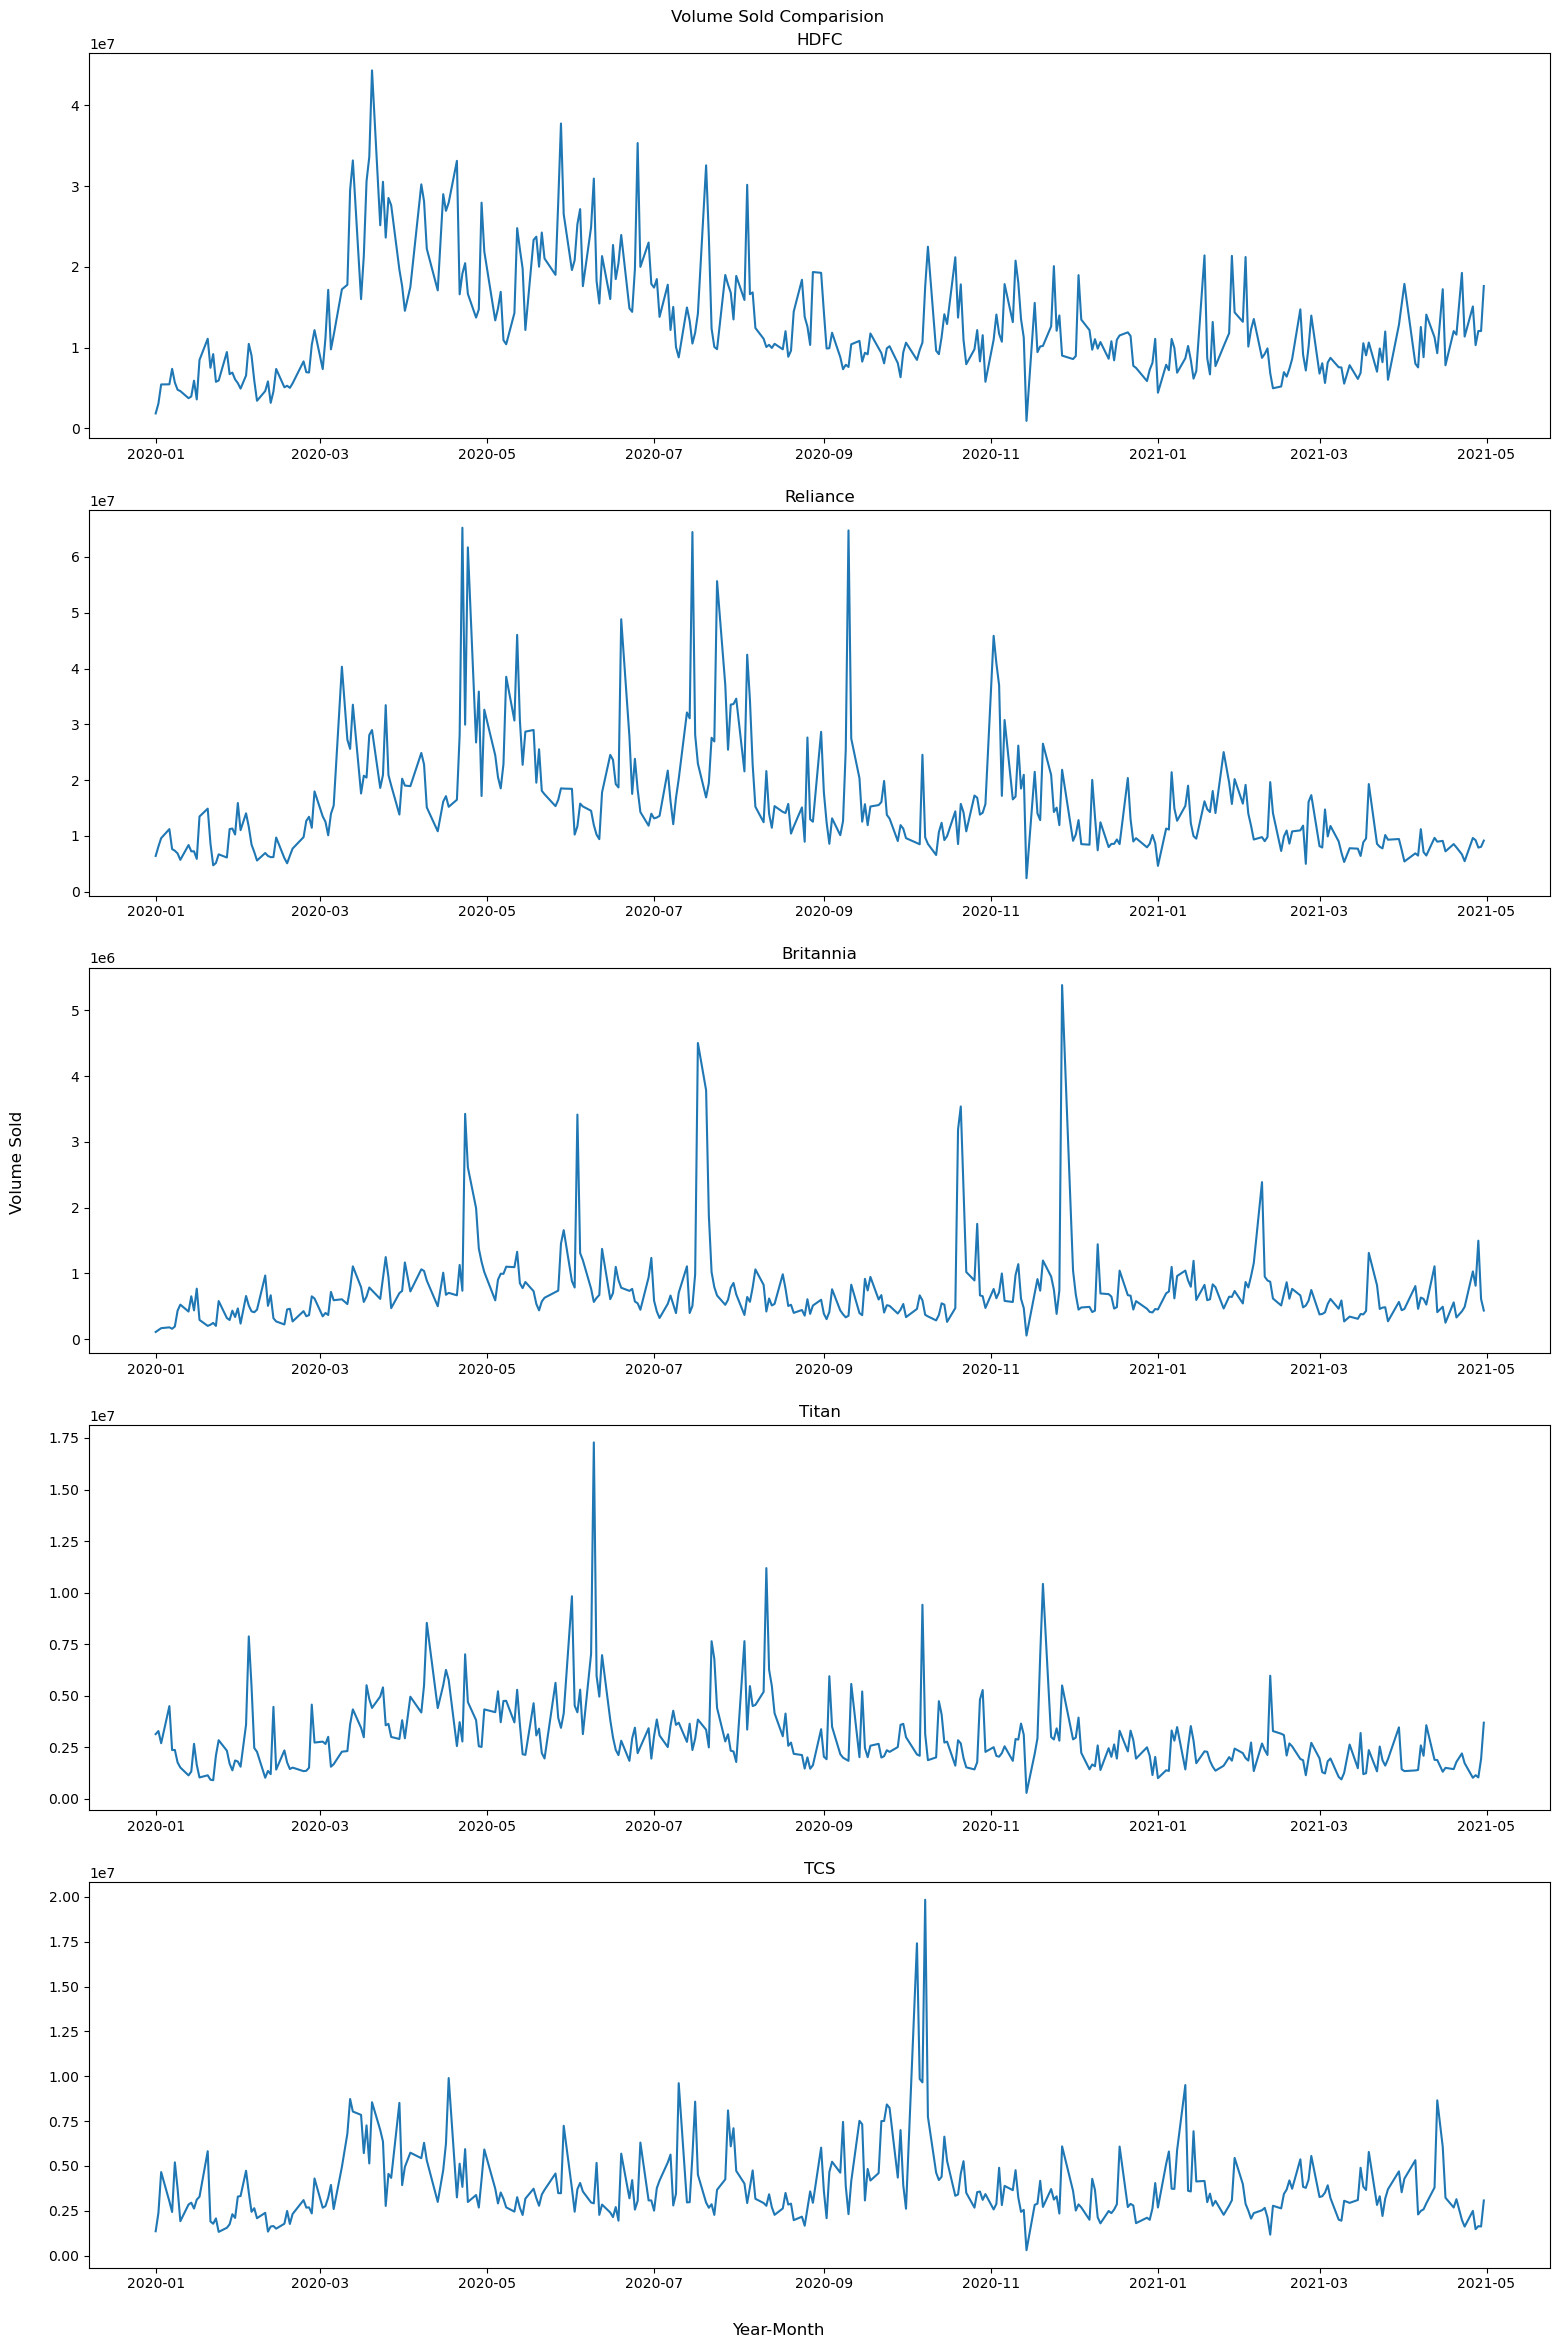

In [92]:
fig, axes = plt.subplots(5, 1, figsize = (16,24))
fig.supxlabel('Year-Month')
fig.supylabel('Volume Sold')
fig.suptitle('Volume Sold Comparision')
axes[0].set_title('HDFC')
axes[0].plot('Date','Volume', data = hdfc_df)
axes[1].set_title('Reliance')
axes[1].plot('Date','Volume', data = rel_df)
axes[2].set_title('Britannia')
axes[2].plot('Date','Volume', data = brit_df)
axes[3].set_title('Titan')
axes[3].plot('Date','Volume', data = titan_df)
axes[4].set_title('TCS')
axes[4].plot('Date','Volume', data = tcs_df)

plt.tight_layout(pad =2)

From the graph, it can be observed that there are few peaks in the volume sold, likely corresponding to sudden drops in share closing prices. Overall, there appears to be no significant change in the total volume sold over time.
It's evident that Reliance has the highest Volume sold among all companies.    

## Comparison of Turnover Across Companies

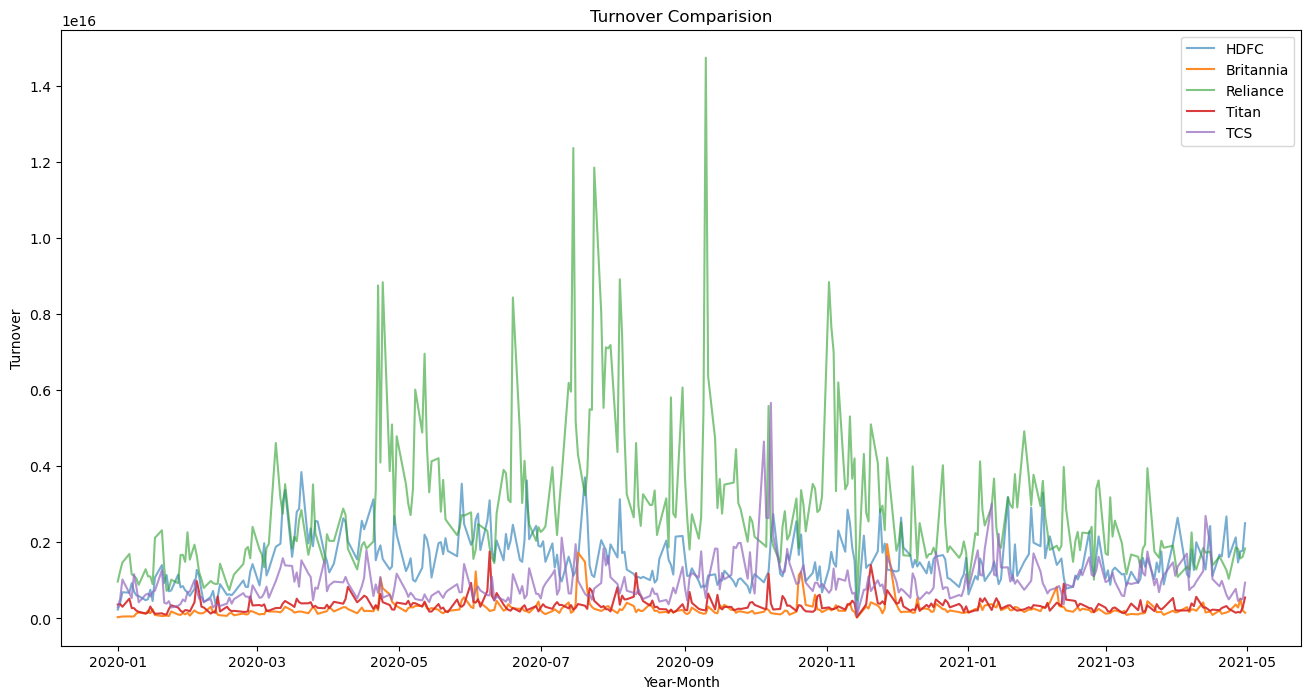

In [89]:
plt.figure(figsize = (16,8))
plt.title('Turnover Comparision')
plt.xlabel('Year-Month')
plt.ylabel('Turnover')
plt.plot('Date','Turnover', data = hdfc_df, alpha = 0.6)
plt.plot('Date','Turnover', data = brit_df, alpha = 0.9)
plt.plot('Date','Turnover', data = rel_df, alpha = 0.6)
plt.plot('Date','Turnover', data = titan_df, alpha = 0.9)
plt.plot('Date','Turnover', data = tcs_df, alpha = 0.7)
plt.legend(['HDFC', 'Britannia', 'Reliance', 'Titan', 'TCS'])

From the graph, it can be concluded that Reliance has the highest turnover, which aligns with its highest volume sold and average closing price.

## Comparison between Last Traded price and Closing price of each Company

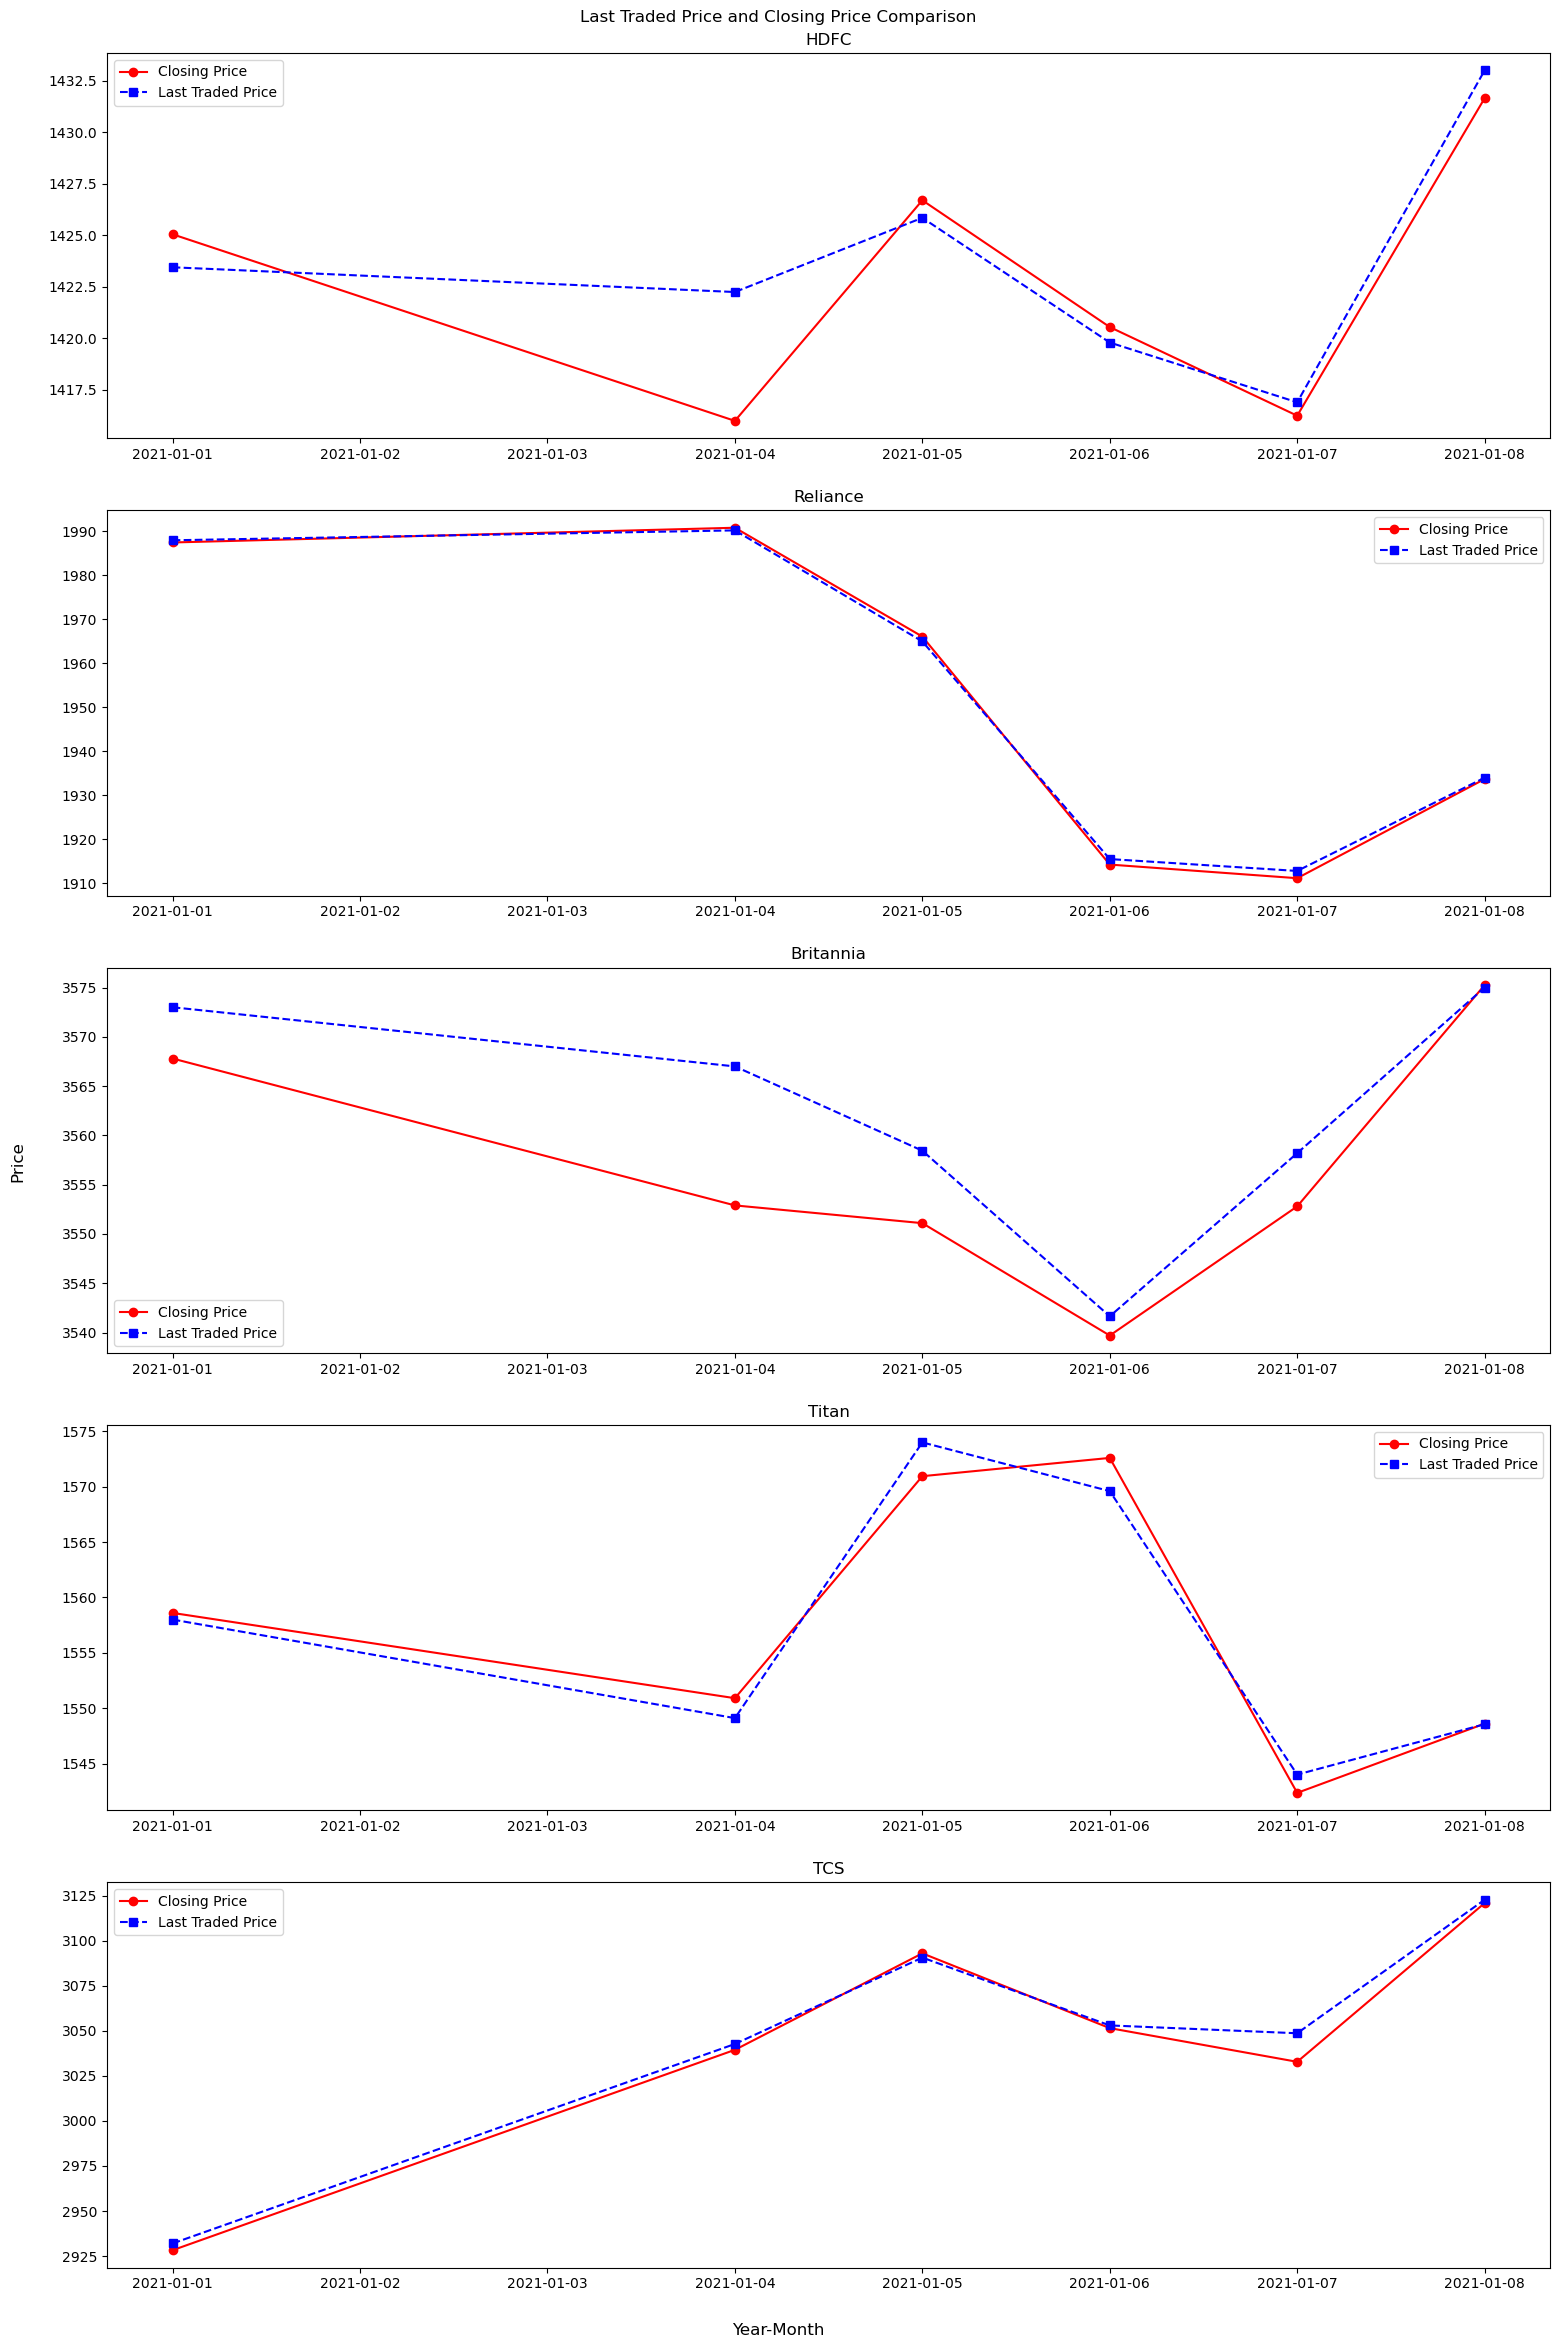

In [166]:
fig, axes = plt.subplots(5, 1, figsize=(16, 24))
fig.supxlabel('Year-Month')
fig.supylabel('Price')
fig.suptitle('Last Traded Price and Closing Price Comparison')

start_date = np.datetime64('2021-01-01')
end_date = np.datetime64('2021-01-10')

dataframes = [hdfc_df, rel_df, brit_df, titan_df, tcs_df]
titles = ['HDFC', 'Reliance', 'Britannia', 'Titan', 'TCS']

for i, (df, title) in enumerate(zip(dataframes, titles)):
    new_df = df[(df['Date'] >= start_date) & (df['Date'] <= end_date)]
    axes[i].set_title(title)
    axes[i].plot('Date', 'Close', 'o-r', data=new_df)
    axes[i].plot('Date', 'Last', 's--b', data=new_df)
    axes[i].legend(['Closing Price', 'Last Traded Price'])

plt.tight_layout(pad=2)


Based on the above graph, it can be observed that Reliance and TCS show minimal differences between their closing and last traded prices. In contrast, Britannia and HDFC exhibit frequent large discrepancies, indicating high volatility in their stock prices during the last hour of the trading day.

In [150]:
final_df.rename(columns = {'%Deliverble' : '%Deliverable'})
final_df.reset_index(drop = True)

,Date,Name,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Deliverable Volume,%Deliverable,Trades
0,2020-01-01,reliance,1514.05,1518.00,1527.10,1505.5,1511.80,1509.60,1515.23,6402372,9.701063e+14,1523290.0,0.2379,122265.0
1,2020-01-02,reliance,1509.60,1512.00,1540.95,1512.0,1534.10,1535.30,1530.86,8096561,1.239471e+15,3386321.0,0.4182,151727.0
2,2020-01-03,reliance,1535.30,1533.00,1541.65,1523.0,1536.00,1537.15,1532.73,9593498,1.470428e+15,5288843.0,0.5513,149003.0
3,2020-01-06,reliance,1537.15,1520.00,1527.90,1498.0,1499.90,1501.50,1512.57,11209343,1.695494e+15,6398638.0,0.5708,225138.0
4,2020-01-07,reliance,1501.50,1519.00,1534.50,1513.5,1526.95,1524.60,1523.12,7627191,1.161710e+15,3049916.0,0.3999,180713.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1655,2021-04-26,britannia,3650.30,3661.10,3662.00,3531.0,3546.00,3539.20,3558.62,1031406,3.670382e+14,507276.0,0.4918,72258.0
1656,2021-04-27,britannia,3539.20,3572.70,3574.60,3517.0,3546.00,3541.20,3539.42,813608,2.879697e+14,322686.0,0.3966,46189.0
1657,2021-04-28,britannia,3541.20,3488.00,3527.00,3469.0,3470.00,3478.75,3495.13,1498181,5.236339e+14,763715.0,0.5098,97170.0
1658,2021-04-29,britannia,3478.75,3496.75,3505.90,3447.0,3464.00,3468.90,3471.18,611087,2.121195e+14,309653.0,0.5067,41655.0


In [141]:
comp_grp_df = final_df.groupby(final_df.Name)

In [149]:
comp_grp_df[['%Deliverable']].mean()

,%Deliverable
Name,
britannia,0.416872
hdfcbank,0.456913
reliance,0.343883
tcs,0.431808
titan,0.298358


Based on the above information, we can conclude that HDFC has a higher percentage of stock deliveries, indicating greater reliability for investment.

## Comparison of VWAP and Closing Price of each Company

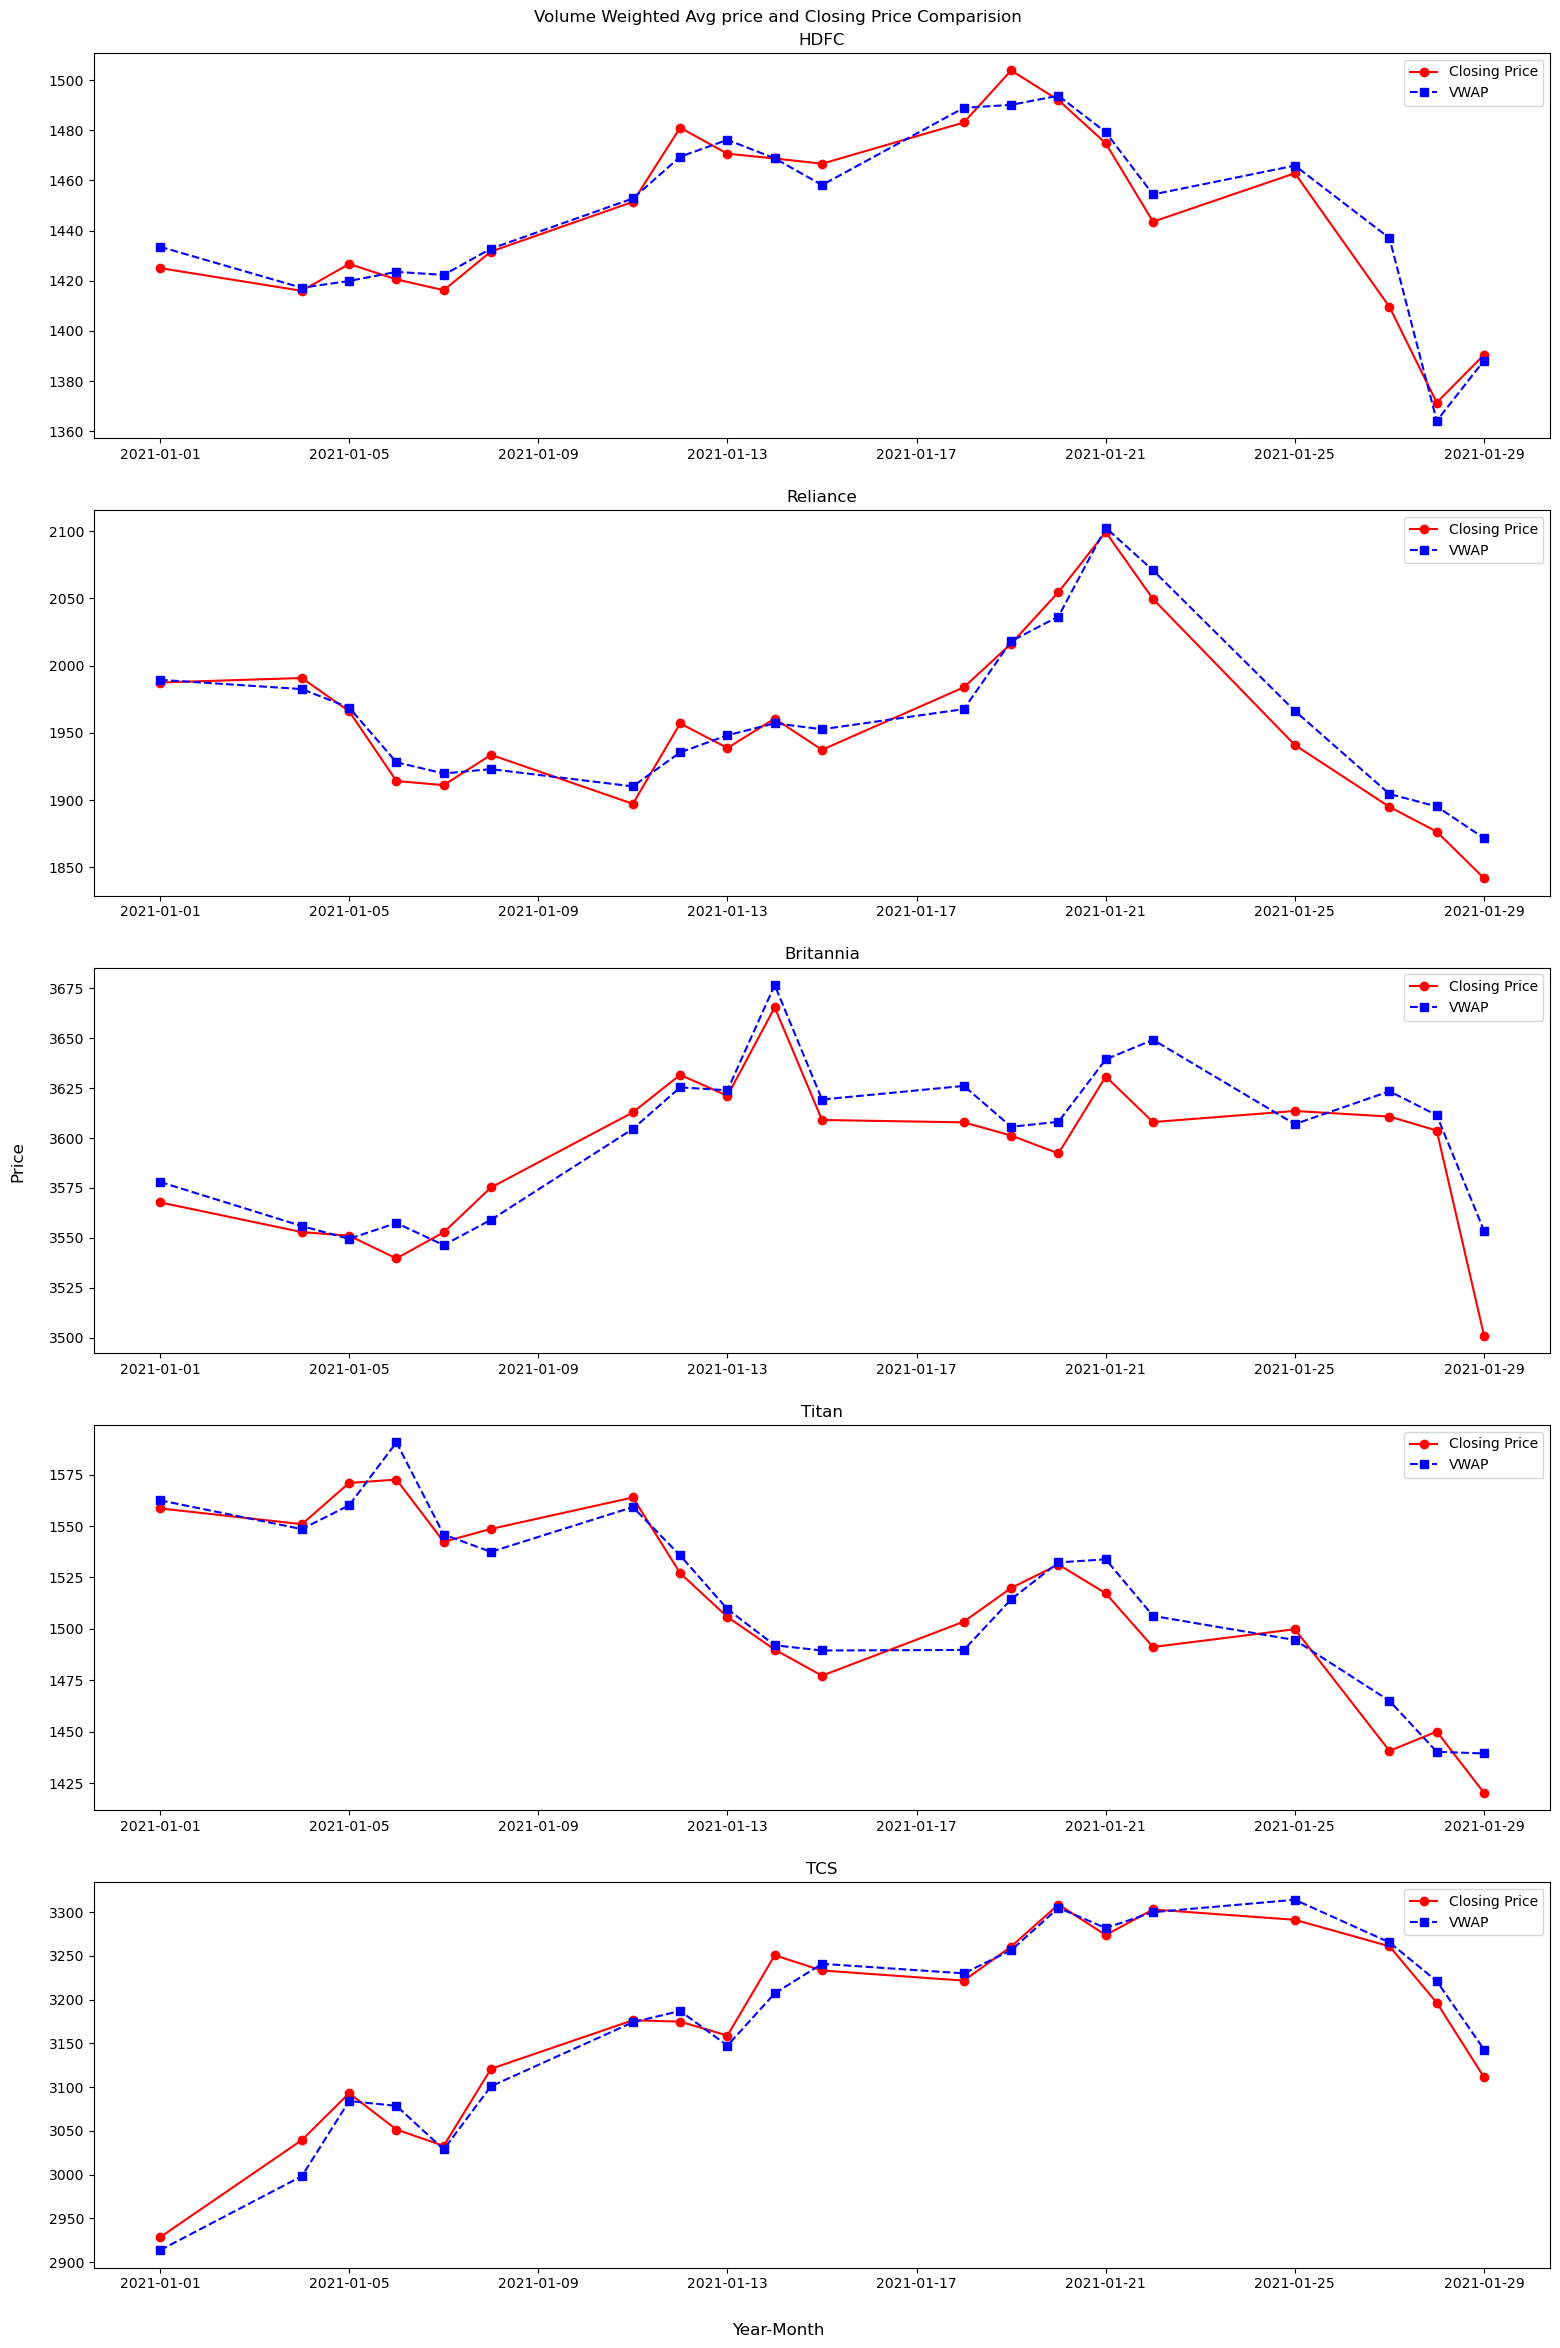

In [155]:
fig, axes = plt.subplots(5, 1, figsize = (16,24))
fig.supxlabel('Year-Month')
fig.supylabel('Price')
fig.suptitle('Volume Weighted Avg price and Closing Price Comparision')

start_date = np.datetime64('2021-01-01')
end_date = np.datetime64('2021-01-30')

def plot_company_data(ax, df, title):
    new_df = df[(df['Date'] >= start_date) & (df['Date'] <= end_date)]
    ax.set_title(title)
    ax.plot('Date', 'Close', 'o-r', data=new_df)
    ax.plot('Date', 'VWAP', 's--b', data=new_df)
    ax.legend(['Closing Price', 'VWAP'])


plot_company_data(axes[0], hdfc_df, 'HDFC')
plot_company_data(axes[1], rel_df, 'Reliance')
plot_company_data(axes[2], brit_df, 'Britannia')
plot_company_data(axes[3], titan_df, 'Titan')
plot_company_data(axes[4], tcs_df, 'TCS')

plt.tight_layout(pad =2)

Based on the above graph trends, it could be interpreted that there is not a significant difference between the day's average price and the closing price for most stocks. However, in the case of Britannia, the closing price is frequently lower than the average price, suggesting an opportunity for investors to sell stocks during the early hours of the trading day and buy them back at the end of trading hours.

## Comparison of VWAP and Opening Price of each Company

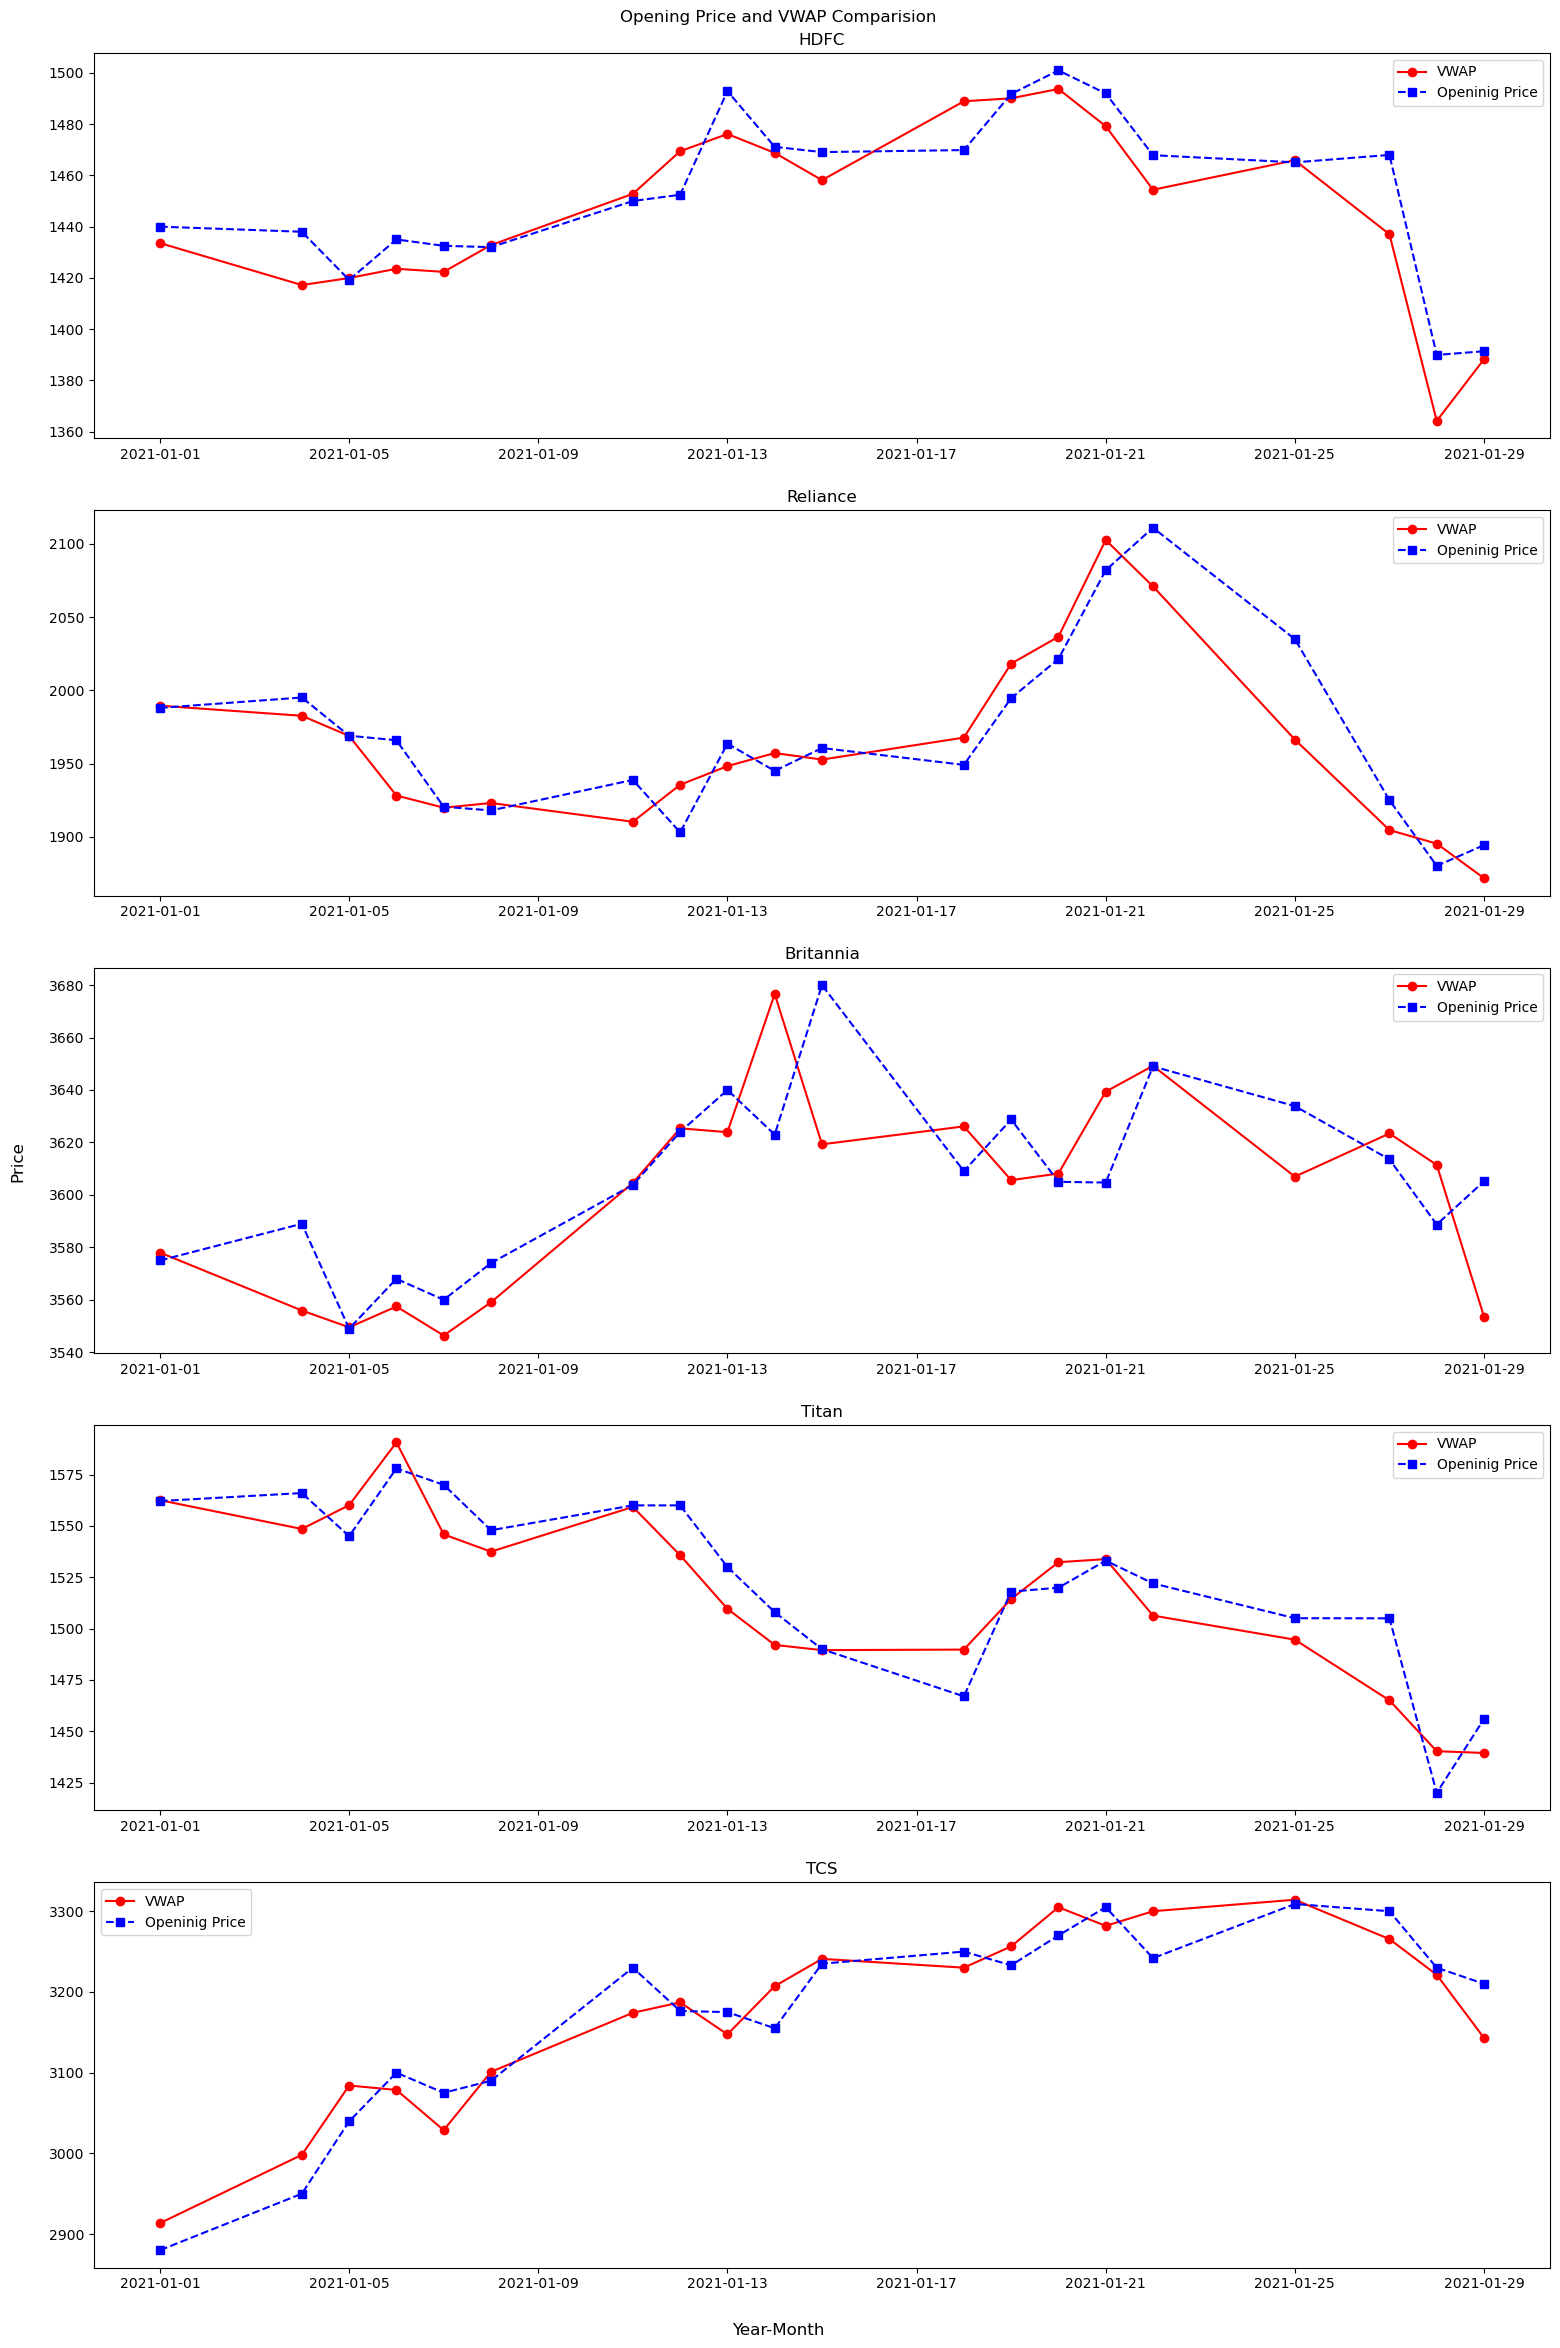

In [161]:
fig, axes = plt.subplots(5, 1, figsize = (16,24))
fig.supxlabel('Year-Month')
fig.supylabel('Price')
fig.suptitle('Opening Price and VWAP Comparision')

start_date = np.datetime64('2021-01-01')
end_date = np.datetime64('2021-01-30')

def plot_company_data(ax, df, title):
    new_df = df[(df['Date'] >= start_date) & (df['Date'] <= end_date)]
    ax.set_title(title)
    ax.plot('Date', 'VWAP', 'o-r', data=new_df)
    ax.plot('Date', 'Open', 's--b', data=new_df)
    ax.legend(['VWAP', 'Openinig Price'])


plot_company_data(axes[0], hdfc_df, 'HDFC')
plot_company_data(axes[1], rel_df, 'Reliance')
plot_company_data(axes[2], brit_df, 'Britannia')
plot_company_data(axes[3], titan_df, 'Titan')
plot_company_data(axes[4], tcs_df, 'TCS')

plt.tight_layout(pad =2)

From the above graph, it could be suggestive of not buying stocks of Britannia and Reliance in the early hours of a trading day, as their opening price is frequently higher than the average price.

Based on the analysis conducted throughout this Exploratory Data Analysis project, several key insights can be drawn regarding the performance and trading behaviors of the analyzed companies:

1. **HDFC**:
   - **Volume Sold**: Consistently high, indicating strong trading activity.
   - **Price Trends**: The closing prices remain relatively stable with minor fluctuations.
   - **Investment Insight**: High percentage of stock deliveries to Demat accounts suggests reliability and potential for long-term investment.

2. **Reliance**:
   - **Volume Sold**: Among the highest, reflecting significant market interest and liquidity.
   - **Price Trends**: Minor differences between closing prices and last traded prices indicate stable trading patterns.
   - **Investment Insight**: Despite high volumes, the consistency in price trends suggests it as a good option for both day trading and long-term investment.

3. **Britannia**:
   - **Volume Sold**: Lower compared to Reliance and HDFC but with noticeable peaks.
   - **Price Trends**: Frequent disparities between opening and average prices suggest higher volatility.
   - **Investment Insight**: Investors might consider selling stocks early in the day and buying towards the end due to frequent lower closing prices.

4. **Titan**:
   - **Volume Sold**: Moderate with occasional peaks.
   - **Price Trends**: Stable with minor fluctuations, similar to HDFC.
   - **Investment Insight**: Steady performance makes it a reliable candidate for conservative investment strategies.

5. **TCS**:
   - **Volume Sold**: Moderate and consistent.
   - **Price Trends**: Comparable to Reliance with minor differences between closing and last traded prices.
   - **Investment Insight**: The stability in trading volumes and prices suggests TCS as a dependable stock for steady growth.

### General Observations:
- **Market Trends**: A significant drop in closing prices was observed towards the end of February 2020, correlating with the onset of the COVID-19 pandemic. This indicates that external factors can have substantial impacts on stock performance.
- **Trading Patterns**: Companies like Britannia and Reliance show higher volatility in early trading hours, which can be leveraged for short-term trading strategies.
- **Investment Strategies**: Consistent performers like HDFC and TCS provide safer investment options, whereas more volatile stocks like Britannia offer opportunities for higher returns with increased risk.

### Conclusion:
This EDA highlights the importance of understanding trading patterns, volume trends, and price stability when making investment decisions. By leveraging these insights, investors can tailor their strategies to maximize returns while managing risks effectively. Future analyses could incorporate additional factors such as market news, sector performance, and macroeconomic indicators to further refine investment strategies.